# Visualizing Word Embeddings with t-SNE

This notebook shall explore the corpus used in this project using word embeddings (word2vec) with t-SNE. Code cells have been individually cited via comments wherever third-party code has been referred to or implemented, and a citation list has been added at the bottom of this notebook in Harvard style referencing. The observations made from the scatter plots can be found in the critical essay. 

### Importing the Required Libraries:

In [1]:
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import re
from nltk.corpus import stopwords
import codecs

### Cleaning the Data and Applying t-SNE:

In [2]:
stopWords = set(stopwords.words('english'))

# Adapted from https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in stopWords:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

# Adapted from https://stackoverflow.com/questions/40581010/how-to-run-tsne-on-word2vec-created-from-gensim
def clean(text):
    lines = re.split('[?!.:]\s',re.sub('\n', ' ', text))
    return [re.sub('[^a-zA-Z]', ' ', clean_sentence(line)).lower().split() for line in lines]

# From https://github.com/nchah/word2vec4everything/blob/master/python/word2vec4everything-basic.py
def read_data(input_data):
    """Load the dataset"""
    with codecs.open(input_data, encoding='utf8') as f:
        data = f.read()
    return data

In [3]:
# From https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

### Applying Word2Vec and Plotting the tSNE for Grade 1 Indian Text:

In [4]:
#Load the data from a text file into a variable
data1 = read_data("data/gradeoneindia.txt") 

In [5]:
cleaned1 = clean(data1)

In [6]:
# https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
# Build the word2vec model for the data. 
model1 = Word2Vec(cleaned1, workers=4, vector_size=290, min_count=2, window=10, sample=1e-3)
len(model1.wv.index_to_key) #vocab size

209

                                 'Data from a Grade One Textbook from India'


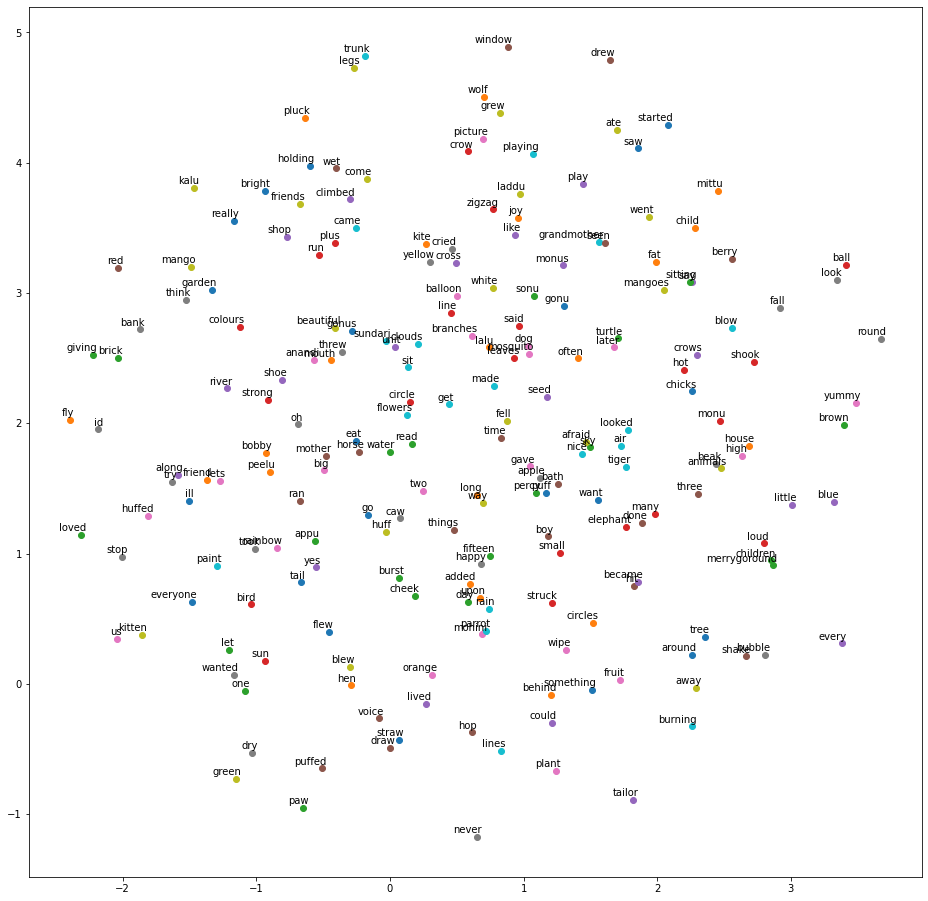

In [7]:
# Plot the tSNE!
print("                                 'Data from a Grade One Textbook from India'")
tsne_plot(model1)

### Applying Word2Vec and Plotting the tSNE for Grade 10 Indian Text:

In [8]:
#Load the data from a text file into a variable
data10 = read_data("data/gradetenindia.txt") 

In [9]:
cleaned10 = clean(data10)

In [10]:
# https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
# Build the word2vec model for the data. 
model10 = Word2Vec(cleaned10, workers=4, vector_size=290, min_count=9, window=10, sample=1e-3)
len(model10.wv.index_to_key) #vocab size

215

                                 'Data from a Grade Ten Textbook from India'


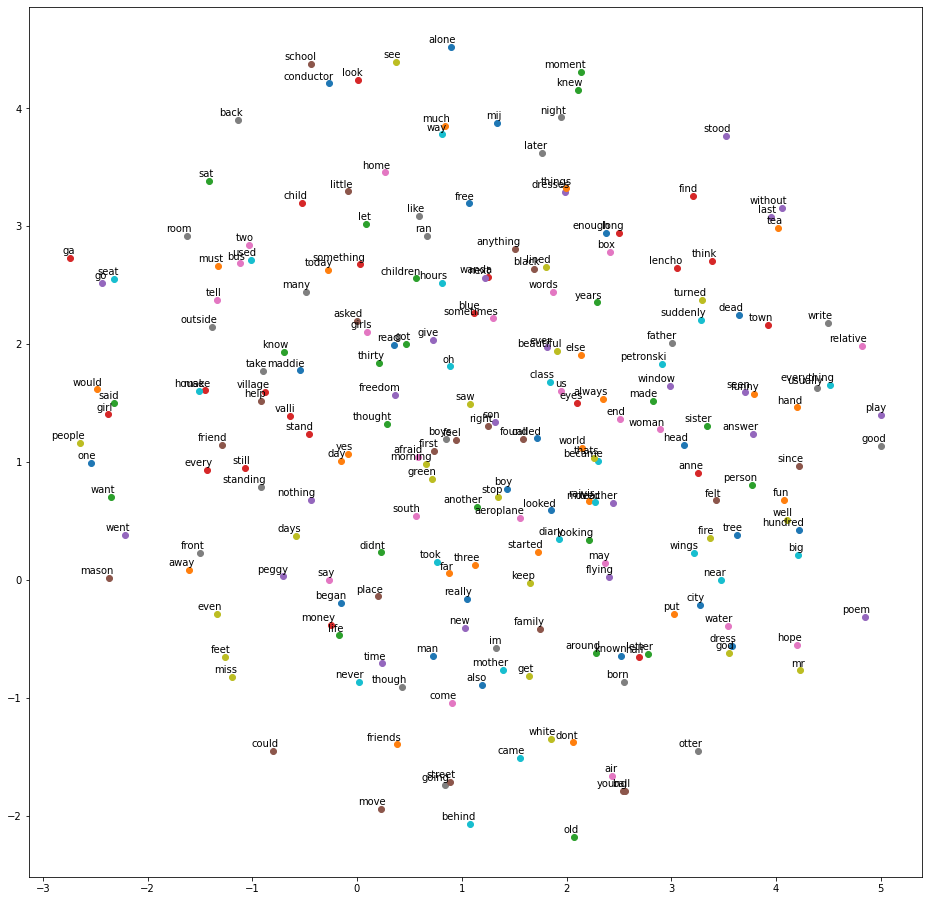

In [11]:
# Plot the tSNE!
print("                                 'Data from a Grade Ten Textbook from India'")
tsne_plot(model10)

### Applying Word2Vec and Plotting the tSNE for Grade 4 Afghan Text:

In [12]:
#Load the data from a text file into a variable
data4 = read_data("data/gradefourafghan.txt") 

In [13]:
cleaned4 = clean(data4)

In [59]:
# https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
# Build the word2vec model for the data. 
model4 = Word2Vec(cleaned4, workers=4, vector_size=290, min_count=13, window=10, sample=1e-3)
len(model4.wv.index_to_key) #vocab size

115

                             'Data from a Grade Four Textbook from Afghanistan'


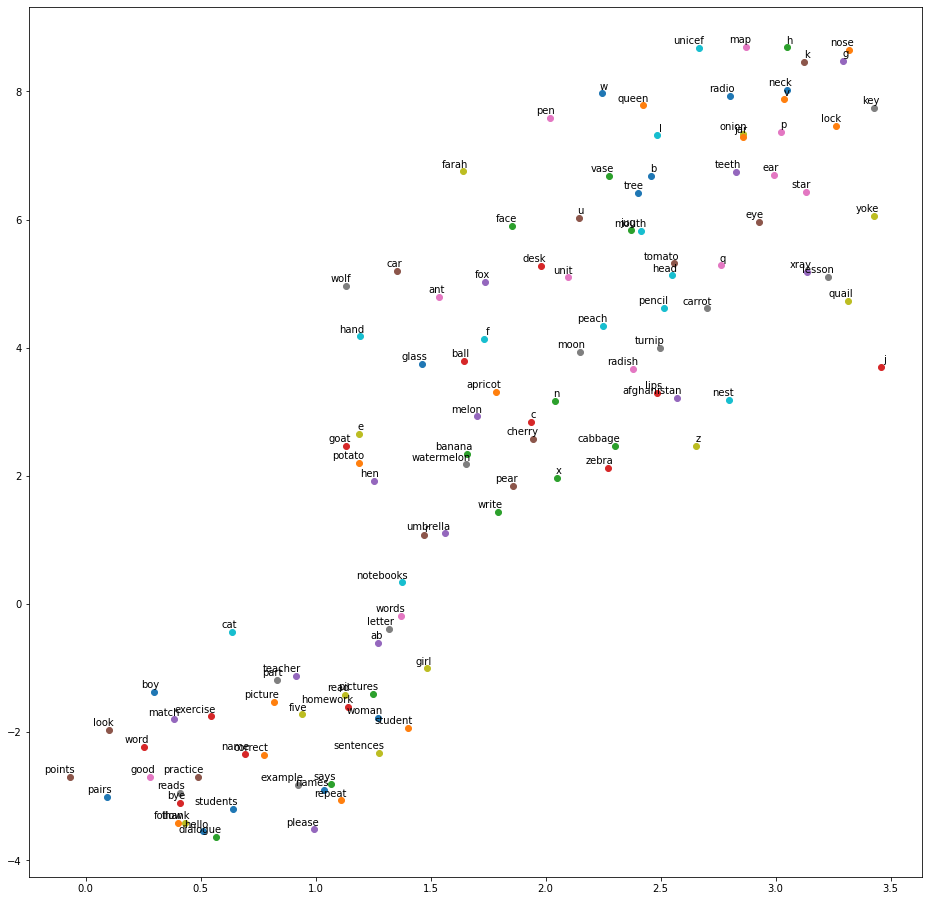

In [60]:
# Plot the tSNE!
print("                             'Data from a Grade Four Textbook from Afghanistan'")
tsne_plot(model4)

### Applying Word2Vec and Plotting the tSNE for Grade 12 Afghan Text:

In [16]:
#Load the data from a text file into a variable
data12 = read_data("data/gradetwelveafghan.txt") 

In [17]:
cleaned12 = clean(data12)

In [18]:
# https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
# Build the word2vec model for the data. 
model12 = Word2Vec(cleaned12, workers=4, vector_size=290, min_count=13, window=10, sample=1e-3)
len(model12.wv.index_to_key) #vocab size

244

                               'Data from a Grade Twelve Textbook from Afghanistan'


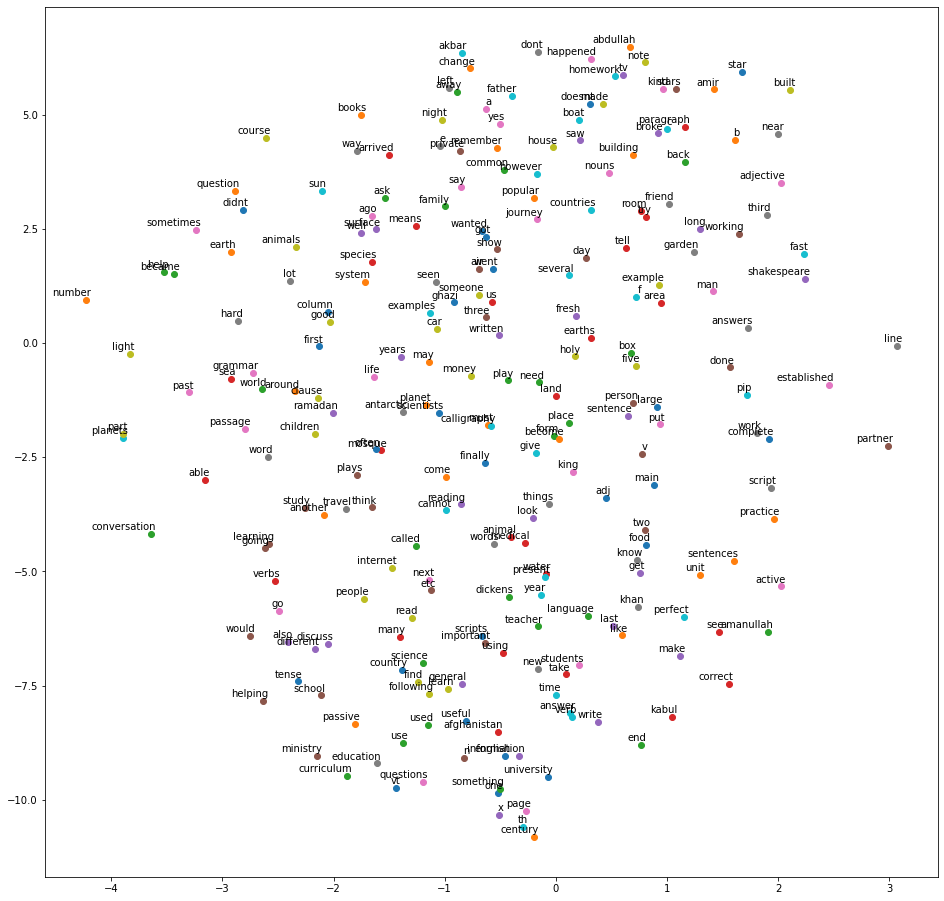

In [19]:
# Plot the tSNE!
print("                               'Data from a Grade Twelve Textbook from Afghanistan'")
tsne_plot(model12)

### Applying Word2Vec and Plotting the tSNE for Grade 2 Indonesian Text:

In [20]:
#Load the data from a text file into a variable
data6 = read_data("data/gradetwoindo.txt") 

In [21]:
cleaned6 = clean(data6)

In [35]:
# https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
# Build the word2vec model for the data. 
model6 = Word2Vec(cleaned6, workers=4, vector_size=290, min_count=10, window=10, sample=1e-3)
len(model6.wv.index_to_key) #vocab size

153

                             'Data from a Grade Two Textbook from Indonesia'


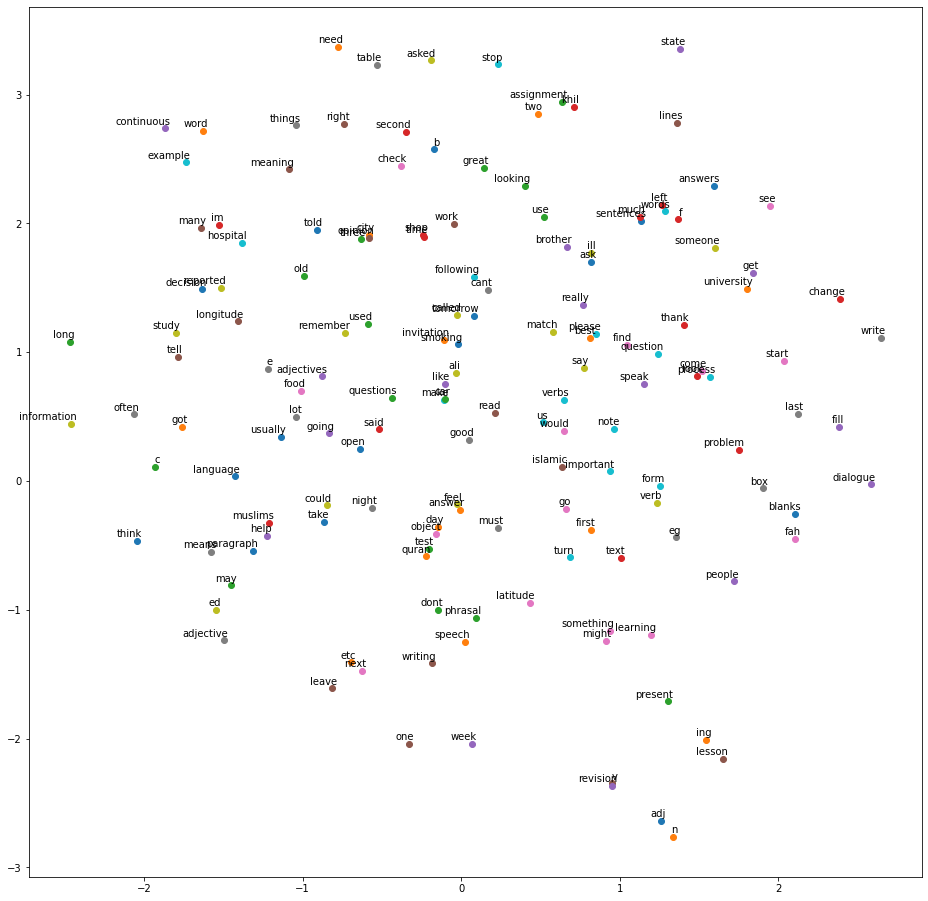

In [36]:
# Plot the tSNE!
print("                             'Data from a Grade Two Textbook from Indonesia'")
tsne_plot(model6)

### Applying Word2Vec and Plotting the tSNE for Grade 6 text from the Islamic State:

In [24]:
#Load the data from a text file into a variable
data6 = read_data("data/gradesixis.txt") 

In [25]:
cleaned6 = clean(data6)

In [28]:
# https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4
# Build the word2vec model for the data. 
model6 = Word2Vec(cleaned6, workers=4, vector_size=290, min_count=9, window=10, sample=1e-3)
len(model6.wv.index_to_key) #vocab size

172

                             'Data from a Grade Six Textbook from the Islamic State'


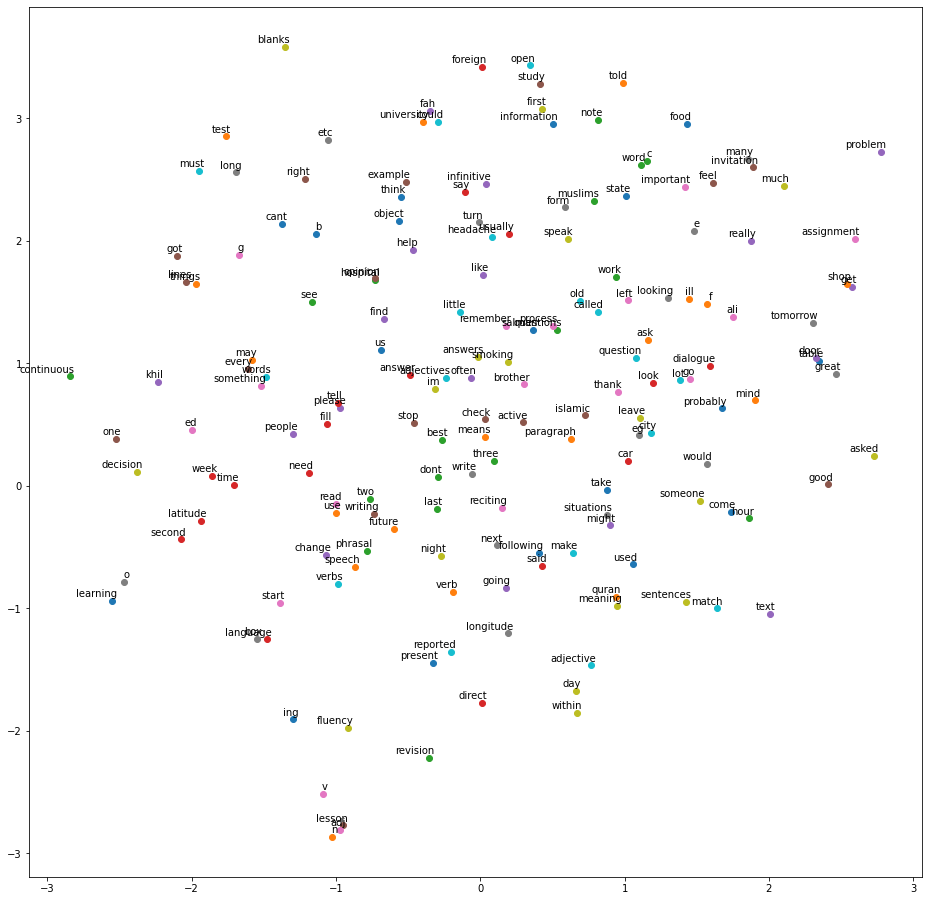

In [29]:
# Plot the tSNE!
print("                             'Data from a Grade Six Textbook from the Islamic State'")
tsne_plot(model6)

#### `(All observations and findings shall be included in the critical essay).`

### Citation List:

Websites:

1) Gensim, H., 2021. How to run tsne on word2vec created from gensim?. [online] Stack Overflow. Available at: <https://stackoverflow.com/questions/40581010/how-to-run-tsne-on-word2vec-created-from-gensim> [Accessed 15 December 2021].

2) McCallum, L. and Fiebrink, R., 2021. NLP Week 4.2-Word2Vec with tSNE Task. [online] GitHub. Available at: <https://git.arts.ac.uk/lmccallum/nlp-21-22/blob/master/NLP%20Week%204.2-Task.ipynb> [Accessed 5 December 2021].

3) GitHub. 2021. Migrating from Gensim 3.x to 4 · RaRe-Technologies/gensim Wiki. [online] Available at: <https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4> [Accessed 5 December 2021].

4) GitHub. 2021. nchah/word2vec4everything: Python CLI to apply word2vec to all sorts of text documents.. [online] Available at: <https://github.com/nchah/word2vec4everything> [Accessed 5 December 2021].

5) Kaggle.com. 2021. Visualizing Word Vectors with t-SNE. [online] Available at: <https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne> [Accessed 5 December 2021].